<a href="https://colab.research.google.com/github/Martinluther123/SN-Bootcamp-projects/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/fraud_data.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

In [24]:
dataset.isnull().sum().sum()

0

In [25]:
dataset.shape

(21693, 30)

In [7]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,0.067173,-0.094268,-0.000667,-0.091499,-0.003917,-0.055079,-0.098357,-0.033488,0.021861,-0.001762,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,1.154227,1.364933,0.989655,1.356199,0.916582,1.096472,1.424975,0.936769,0.843902,0.727979,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,-3.995739,-18.553697,-3.844974,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-4.395283,-21.024817,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,-0.739193,-0.438730,-0.634030,-0.438416,-0.582193,-0.492689,-0.498984,-0.513216,-0.444441,-0.209710,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,0.005596,0.126666,-0.018642,0.044870,0.048753,0.059504,-0.075797,-0.019269,0.021719,-0.057330,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,0.786044,0.613676,0.652241,0.490003,0.642463,0.525327,0.389992,0.494700,0.484930,0.139059,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,12.018913,3.966626,4.099352,6.441021,5.720479,6.442798,6.609366,3.790316,4.851255,13.119819,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


In [8]:
# checking how much data that contains fraudulent transactions and the ones that contains normal transactions

print(round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2),'% of No Fraud transaction in the dataset')
print(round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2),'% of Fraud transaction in the dataset')



98.36 % of No Fraud transaction in the dataset
1.64 % of Fraud transaction in the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud, 1: Fraud)')

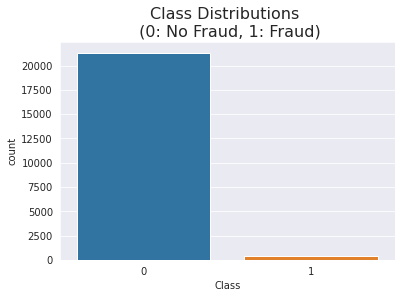

In [9]:
#Checking for data imbalance

sns.countplot('Class', data = dataset)
plt.title('Class Distributions \n (0: No Fraud, 1: Fraud)', fontsize=16)


(0.0, 7712.43)

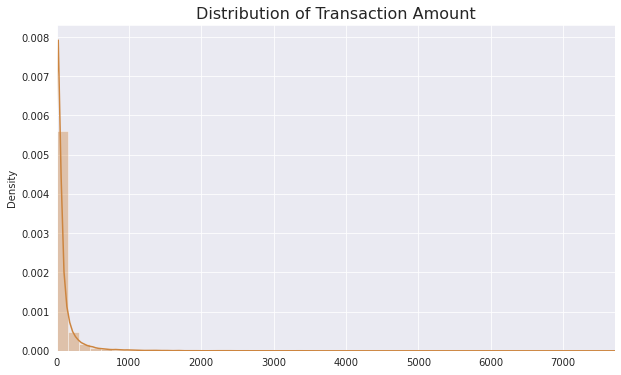

In [10]:
# Data distributions

amount_value = dataset['Amount'].values

fig = plt.subplots(figsize = (10,6))

sns.distplot(amount_value, hist=True, kde=True, color='peru')
plt.title('Distribution of Transaction Amount', fontsize = 16)
plt.xlim([min(amount_value), max(amount_value)])


In [11]:
dataset['Class'].value_counts()

0    21337
1      356
Name: Class, dtype: int64

# Scaling & Distributing

From this phase of the kernel, the Amount column was scaled in order to fit in with other columns. On the other hand,
The sub-sample of the dataframe was created in order to have an equal amount of Fraud and Non-Fraud cases, helping the algorthims better understand patterns that determines whether transaction is Fraud or not.
In this scenario, the sub-sample was created as a dataframe with a ratio of 50:50 of fraud and non-fraud transactions so as to solve the issue of data imbalance on the dataset which was seen on the original dataset that will cause overfitting leading to the model to assume no fraud in most cases, and wrong correlations.

In summary, there are 356 cases of fraud in our dataset so 356 cases of non-fraud was randomly created in a new sub dataframe. Then was concatenated to create a new sub-sample.



In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

sc = StandardScaler()
rbc = RobustScaler()

#To make model affective against outliers, RobustScaler is used

dataset['scaled_Amount'] = rbc.fit_transform(dataset['Amount'].values.reshape(-1,1))


dataset.drop(['Amount'], axis=1, inplace=True)

In [13]:
scaled_Amount = dataset['scaled_Amount']

dataset.drop(['scaled_Amount'], axis=1, inplace=True)
dataset.insert(0,'scaled_Amount',scaled_Amount)

dataset.head(5)

,scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.243004,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,0
1,12.516524,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,0
2,-0.294614,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,0
3,0.564618,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,0
4,-0.271129,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,0


#  Spliting the data before carrying out the modification process of imbalanced data

In [14]:
#The main goal is to fit the model either with the dataframes that were undersample 
#or oversample (in order for the models to detect the patterns), 
#and test it on the original testing set.

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

x = dataset.drop('Class',axis=1)
y = dataset['Class']

ss = StratifiedShuffleSplit(n_splits=5, random_state=45)

for train_index, test_index in ss.split(x,y):
    print("Train:", train_index, "Test:", test_index)
    original_xtrain, original_xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_xtrain = original_xtrain.values
original_xtest = original_xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# checking if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 2725 16374 13408 ... 11499   819 10543] Test: [ 9594 19911 11126 ... 17052  5208 14639]
Train: [18707 10552 11650 ... 12991  9936 18286] Test: [11204  5537 14916 ... 20857 16299  4744]
Train: [ 3744 21087 14503 ...  6241  1550 11298] Test: [ 9831  1277  4117 ... 19278  1327 16451]
Train: [3483 9426  683 ... 1392 7519 2517] Test: [18831 15908 18924 ...  7771 21486 18202]
Train: [19685 10991 14818 ...  4388 12701 18493] Test: [21177 15335  8960 ...  7402  5869  7936]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.98360908 0.01639092]
[0.98341014 0.01658986]


In [15]:
# Since the classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.


data = dataset.sample(frac=1)

# amount of fraud classes 356 rows.
fraud_dataset = dataset.loc[dataset['Class'] == 1]
normal_dataset = dataset.loc[dataset['Class'] == 0][:356]

normal_distributed_df = pd.concat([fraud_dataset, normal_dataset])

#shuffling the data before creating the subsamples
# Shuffling dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head(10)

,scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
152,0.394459,1.504825,-1.325371,-1.192269,-2.471805,0.945322,3.248429,-1.439117,0.737310,-1.989199,1.482905,-0.242234,-1.025505,0.505428,-0.167588,0.754359,-0.072453,0.007391,0.404853,0.115911,-0.127411,-0.245084,-0.543722,-0.033326,0.983639,0.535192,-0.195159,0.025720,0.020668,0
39,-0.308677,2.019538,-0.065014,-0.460906,1.161920,-0.191847,-0.153275,-0.439669,-0.066371,0.834509,0.205989,-1.411916,0.440072,1.029410,-0.198231,0.738454,0.623030,-1.085818,0.471269,-0.505445,-0.190031,0.184558,0.747864,0.048642,-0.648915,0.032263,-0.522844,0.062466,-0.036125,0
13693,0.118689,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,1
16161,1.024750,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,-5.954838,3.586395,-5.517148,0.683652,-8.560423,1.856095,-4.878248,-4.335998,-1.377191,3.057382,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,1
82,0.394459,1.387074,-1.529866,1.158449,-1.454358,-1.888452,0.605092,-1.901095,0.257690,-1.203268,1.429759,0.192765,-0.073096,1.220567,-1.000043,-0.282048,0.327574,-0.133296,1.288309,0.160039,-0.167594,0.055027,0.621938,-0.181402,-0.491632,0.349434,0.024092,0.087156,0.026396,0
81,-0.027422,-1.543016,0.577463,2.098654,-1.630864,-0.694905,1.031860,-0.530834,0.352621,0.352260,1.575069,0.165103,-0.023449,0.200590,-0.970026,0.427104,-0.980689,-0.879455,2.728200,-0.394417,0.331471,-0.337319,0.132442,-0.368779,0.234710,0.552301,-0.079062,0.618471,0.227685,0
14236,0.163690,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,-2.856359,-5.665862,2.540836,-6.147054,1.796891,-4.328989,-0.150037,-1.839005,-3.354638,-0.282307,0.148592,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,1
13902,1.505414,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,1.500629,-0.417898,-1.590295,-1.074999,0.288234,1.377769,0.223887,1.311073,-0.896072,-0.186978,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,1
5598,-0.294614,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,-2.637442,2.858777,-0.553180,-0.758492,-6.455029,-0.154021,1.323833,5.580209,3.293688,-0.137694,0.701292,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1
84,-0.294614,2.098201,-0.109596,-1.814724,-0.221776,0.637626,-0.312991,0.202749,-0.137805,0.445808,0.053503,0.361933,0.892892,-0.044195,0.581761,-0.513307,-0.086755,-0.705296,0.034210,0.818609,-0.187401,-0.140211,-0.291202,0.136328,0.100753,0.103721,-0.092195,-0.059628,-0.072881,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


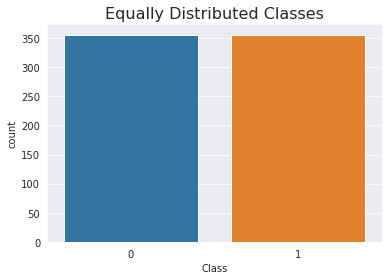

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=16)
plt.show()

# Correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help predict the features that are most relevant for the prediction.

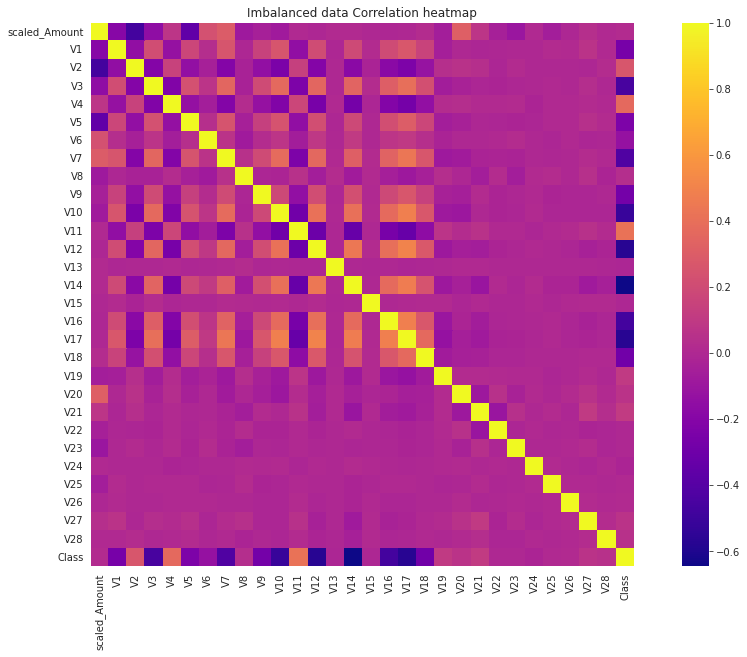

In [17]:
corr = data.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr, cmap=plt.cm.plasma, square = True)
plt.title('Imbalanced data Correlation heatmap')
plt.show()

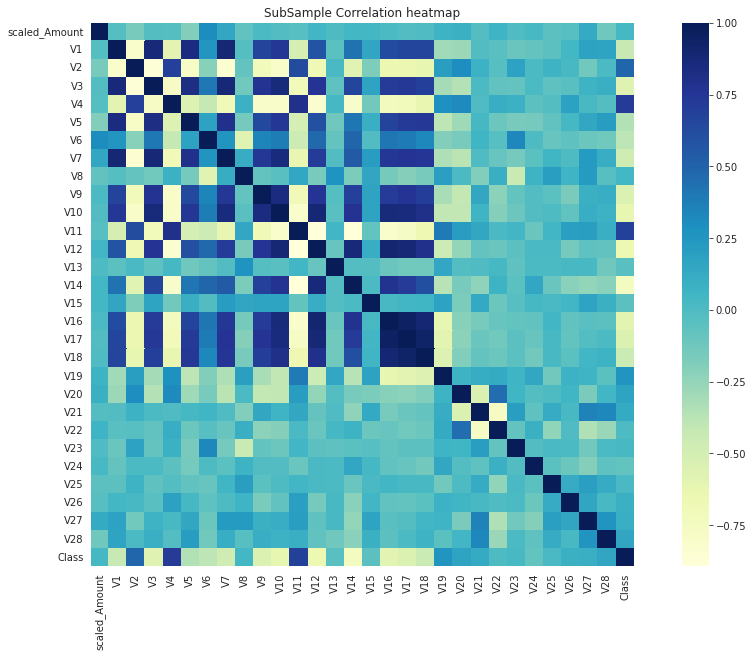

In [18]:
new_corr = new_df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(new_corr, cmap="YlGnBu", square = True)
plt.title('SubSample Correlation heatmap')
plt.show()

In [19]:
# dividing the X and the Y from the new_df data

X = new_df.drop(['Class'], axis = 1) 
Y = new_df["Class"] 
print(X.shape) 
print(Y.shape) 

# getting just the values for the sake of processing  

x_data = X.values 
y_data = Y.values

(712, 29)
(712,)


In [20]:
# Using Skicit-learn to split data into training and testing sets 

from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42) 

# Building a Random Forest Model

In [21]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 
# predictions
y_pred = rfc.predict(x_test) 

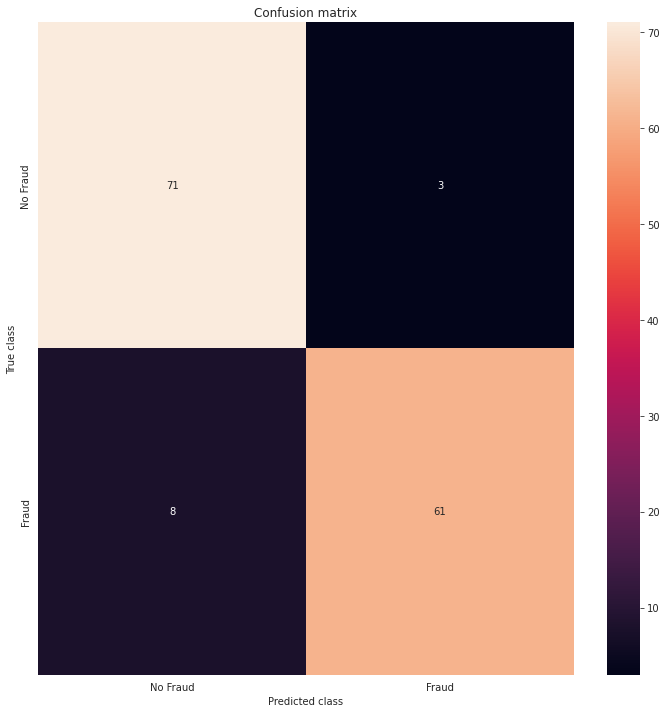

In [22]:
# printing the confusion matrix 
LABELS = ['No Fraud', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        74
           1       0.95      0.88      0.92        69

    accuracy                           0.92       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

